In [9]:
# Hassan Amjad - Capstone Project - Data Science, ML with Python
# Instructor = Waqas
# Total Days = 23
# Total Members = 22
# Total Messages in WhatsApp Group = 4, Pinned Messages = 0
# Sessions Attended = 12, Hours = 24
# Looking forward to seeing you around *Cheers*
import pandas as pd
pd = pd.read_csv('sample_data/ecommerce_sales_data.csv')
import matplotlib.pyplot as plt

In [ ]:
#Exploratory Data Analysis

pd.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [ ]:
pd.tail()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26
999,26-09-2025,Home Decor,93.94,29.68,Regular,4258.11,39


In [ ]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
pd.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [ ]:
pd.columns

Index(['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold'],
      dtype='object')

In [ ]:
pd.shape

(1000, 7)

In [ ]:
pd.isnull().sum()

,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


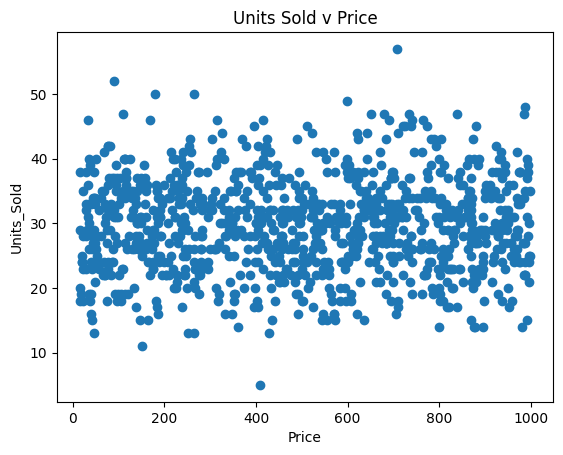

In [4]:
# Visualize Data

plt.scatter(x = pd['Price'], y = pd['Units_Sold'])
plt.xlabel('Price')
plt.ylabel('Units_Sold')
plt.title('Units Sold v Price')
plt.show()

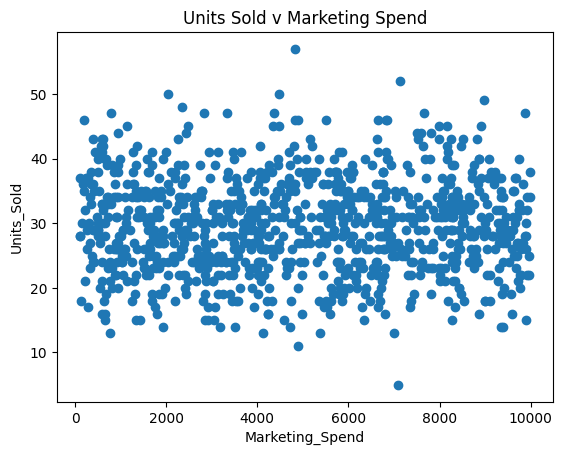

In [ ]:
plt.scatter(x = pd['Marketing_Spend'], y = pd['Units_Sold'])
plt.xlabel('Marketing_Spend')
plt.ylabel('Units_Sold')
plt.title('Units Sold v Marketing Spend')
plt.show()

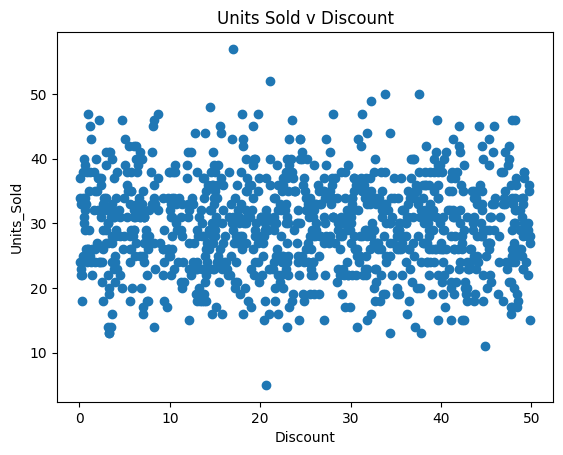

In [5]:
plt.scatter(x = pd['Discount'], y = pd['Units_Sold'])
plt.xlabel('Discount')
plt.ylabel('Units_Sold')
plt.title('Units Sold v Discount')
plt.show()

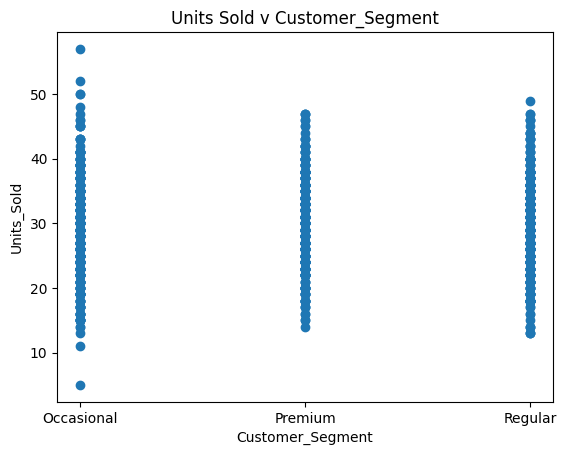

In [6]:
plt.scatter(x = pd['Customer_Segment'], y = pd['Units_Sold'])
plt.xlabel('Customer_Segment')
plt.ylabel('Units_Sold')
plt.title('Units Sold v Customer_Segment')
plt.show()

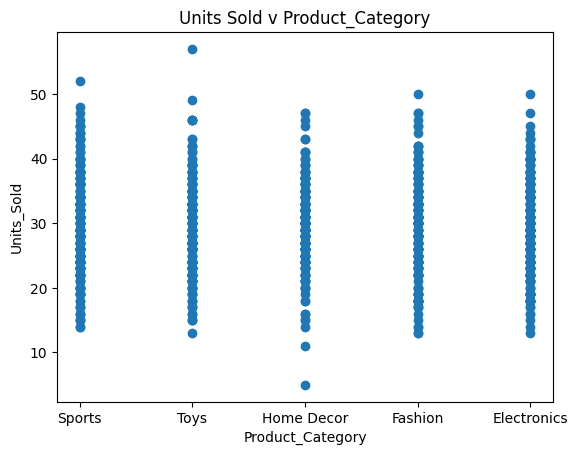

In [7]:
plt.scatter(x = pd['Product_Category'], y = pd['Units_Sold'])
plt.xlabel('Product_Category')
plt.ylabel('Units_Sold')
plt.title('Units Sold v Product_Category')
plt.show()

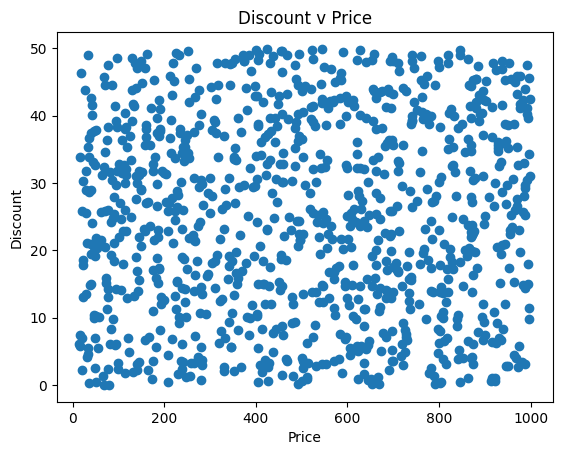

In [8]:
plt.scatter(x = pd['Price'], y = pd['Discount'])
plt.xlabel('Price')
plt.ylabel('Discount')
plt.title('Discount v Price')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = pd[['Marketing_Spend']]
y = pd[['Units_Sold']]
model.fit(x, y)

model.predict([[-1], [6], [15], [10.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[29.51190589],
       [29.51207554],
       [29.51229367],
       [29.51218461]])

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X = pd[['Marketing_Spend']]  # Features (independent variable)
y = pd['Units_Sold']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
Marketing_Spend = model.predict(X_test)

r2_score(y_test, Marketing_Spend)

-0.010037747861110002

In [ ]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_test_pred_poly = model_poly.predict(X_test_poly)
test_accuracy_poly = r2_score(y_test, y_test_pred_poly)

print(f"Test R-squared: {test_accuracy_poly}")

Test R-squared: -0.027999586020248213


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_test_pred_poly = model_poly.predict(X_test_poly)
test_accuracy_poly = r2_score(y_test, y_test_pred_poly)

print(f"Test R-squared: {test_accuracy_poly}")

Test R-squared: -0.027999586020248213


NameError: name 'y_pred_linear' is not defined

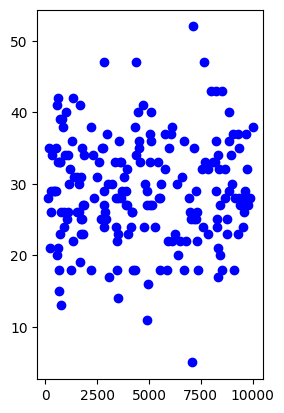

In [ ]:
import seaborn as sns
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Predicted')
plt.xlabel('Marketing Spend')
plt.ylabel('Units Sold')
plt.title('Linear Regression')
plt.legend()

X_range = np.linspace(X['Marketing_Spend'].min(), X['Marketing_Spend'].max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_poly = poly_model.predict(X_range_poly)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_range_poly, color='green', label='Predicted (Poly)')
plt.xlabel('Marketing Spend')
plt.ylabel('Units Sold')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('sample_data/ecommerce_sales_data.csv')

In [ ]:
print(data)

           Date Product_Category  ...  Marketing_Spend  Units_Sold
0    01-01-2023           Sports  ...          6780.38          32
1    02-01-2023             Toys  ...          6807.56          16
2    03-01-2023       Home Decor  ...          3793.91          27
3    04-01-2023             Toys  ...          9422.75          29
4    05-01-2023             Toys  ...          1756.83          17
..          ...              ...  ...              ...         ...
995  22-09-2025          Fashion  ...          1890.83          34
996  23-09-2025      Electronics  ...          8011.66          21
997  24-09-2025      Electronics  ...          3408.51          19
998  25-09-2025           Sports  ...          7335.62          26
999  26-09-2025       Home Decor  ...          4258.11          39

[1000 rows x 7 columns]


In [ ]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [ ]:
data.tail()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26
999,26-09-2025,Home Decor,93.94,29.68,Regular,4258.11,39


In [ ]:
data.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
data.columns

Index(['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold'],
      dtype='object')

In [ ]:
data.shape

(1000, 7)

In [ ]:
print(data)
data.isnull().sum()

           Date Product_Category  ...  Marketing_Spend  Units_Sold
0    01-01-2023           Sports  ...          6780.38          32
1    02-01-2023             Toys  ...          6807.56          16
2    03-01-2023       Home Decor  ...          3793.91          27
3    04-01-2023             Toys  ...          9422.75          29
4    05-01-2023             Toys  ...          1756.83          17
..          ...              ...  ...              ...         ...
995  22-09-2025          Fashion  ...          1890.83          34
996  23-09-2025      Electronics  ...          8011.66          21
997  24-09-2025      Electronics  ...          3408.51          19
998  25-09-2025           Sports  ...          7335.62          26
999  26-09-2025       Home Decor  ...          4258.11          39

[1000 rows x 7 columns]


,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [ ]:
data['Customer_Segment'] = data['Customer_Segment'].map({'Regular': 1,'Premium': 2,'Occasional': 3})

In [ ]:
data['Product_Category'] = data['Product_Category'].map({'Fashion': 1,'Electronics': 2,'Sports': 3, 'Toys': 4, 'Home Decor': 5})

In [ ]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,3,932.80,35.82,3,6780.38,32
1,02-01-2023,4,569.48,3.60,2,6807.56,16
2,03-01-2023,5,699.68,3.56,2,3793.91,27
3,04-01-2023,4,923.27,0.61,2,9422.75,29
4,05-01-2023,4,710.17,47.83,2,1756.83,17


In [ ]:
features = ['Price', 'Discount', 'Marketing_Spend', 'Customer_Segment', 'Product_Category']
X = data[features]
y = data['Units_Sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [ ]:
print("Linear Regression R² Score:", round(r2_linear, 4))
print("Polynomial Regression R² Score:", round(r2_poly, 4))

Linear Regression R² Score: -0.0099
Polynomial Regression R² Score: -0.0209


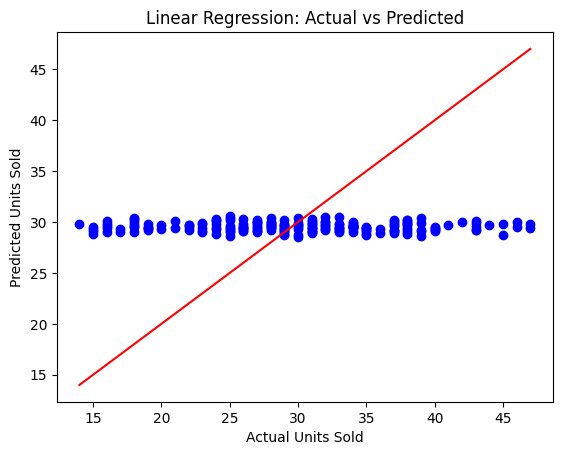

In [ ]:
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


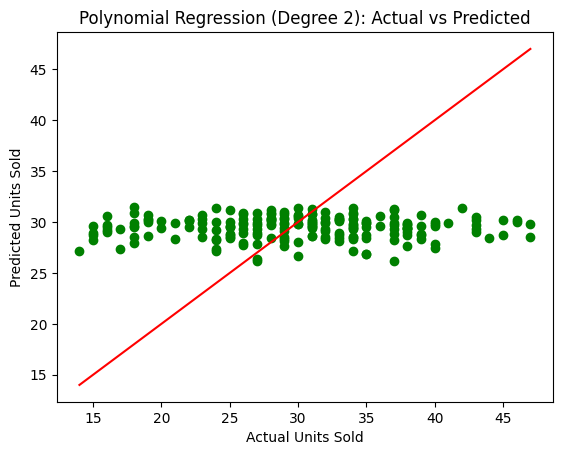

In [ ]:
plt.scatter(y_test, y_pred_poly, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Polynomial Regression (Degree 2): Actual vs Predicted")
plt.show()

In [ ]:
data = pd.read_csv('sample_data/ecommerce_sales_data.csv')

X = data[['Marketing_Spend']]
y = data['Units_Sold']

In [ ]:
data.columns

Index(['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold'],
      dtype='object')

In [ ]:
print(data)

           Date  Product_Category  ...  Marketing_Spend  Units_Sold
0    01-01-2023                 3  ...          6780.38          32
1    02-01-2023                 4  ...          6807.56          16
2    03-01-2023                 5  ...          3793.91          27
3    04-01-2023                 4  ...          9422.75          29
4    05-01-2023                 4  ...          1756.83          17
..          ...               ...  ...              ...         ...
995  22-09-2025                 1  ...          1890.83          34
996  23-09-2025                 2  ...          8011.66          21
997  24-09-2025                 2  ...          3408.51          19
998  25-09-2025                 3  ...          7335.62          26
999  26-09-2025                 5  ...          4258.11          39

[1000 rows x 7 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear1 = r2_score(y_test, y_pred_linear)

In [ ]:
print(r2_linear1)

-0.003795744055557382


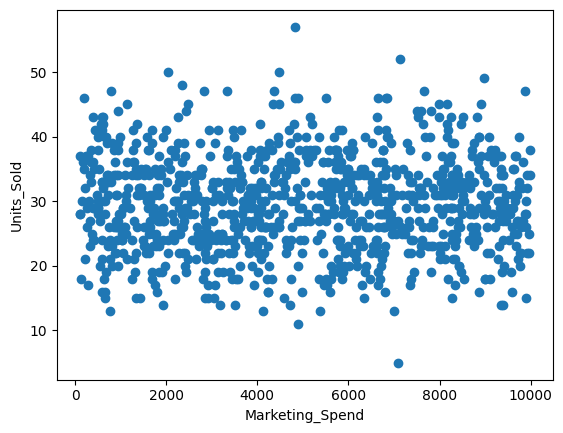

AttributeError: module 'matplotlib.pyplot' has no attribute 'lineplot'

In [ ]:
plt.scatter(x = data['Marketing_Spend'], y = data['Units_Sold'])
plt.xlabel('Marketing_Spend')
plt.ylabel('Units_Sold')
plt.show()

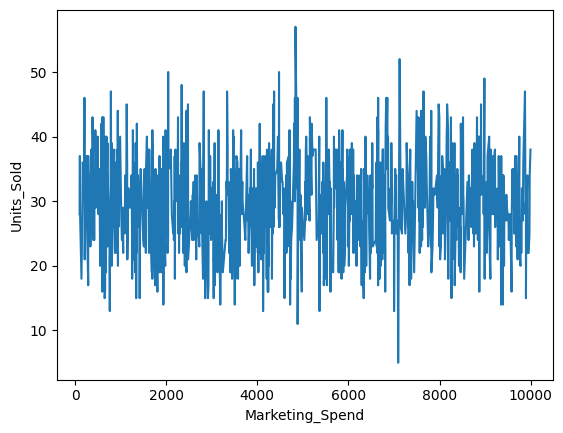

In [ ]:
# Import seaborn
import seaborn as sns

# Visualize Data with Seaborn lineplot
sns.lineplot(x = data['Marketing_Spend'], y = data['Units_Sold'])
plt.show()

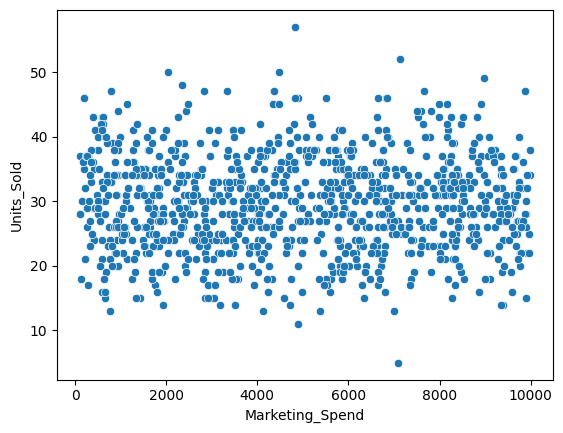

In [ ]:
sns.scatterplot(x = data['Marketing_Spend'], y = data['Units_Sold'])
plt.show()

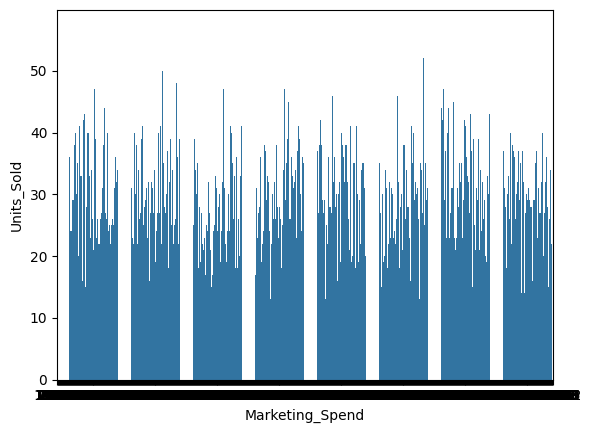

In [ ]:
sns.

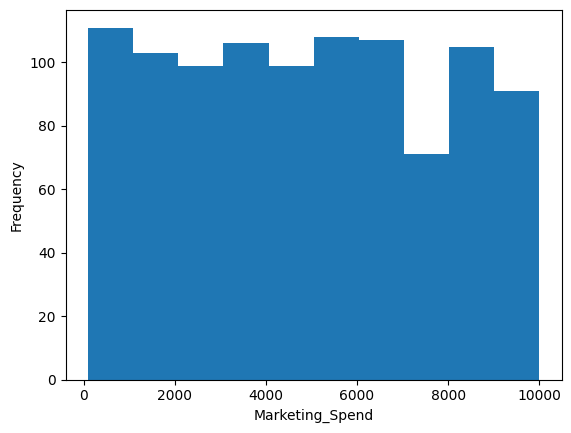

In [ ]:
plt.hist(data['Marketing_Spend'])
plt.xlabel('Marketing_Spend')
plt.ylabel('Frequency')
plt.show()

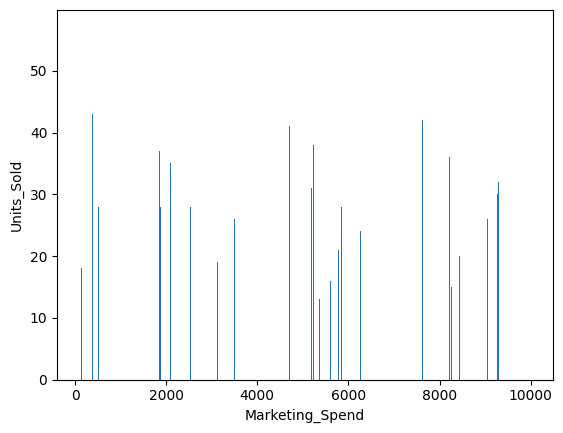

In [ ]:
plt.bar(data['Marketing_Spend'], data['Units_Sold'])
plt.xlabel('Marketing_Spend')
plt.ylabel('Units_Sold')
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly1 = r2_score(y_test, y_pred_poly)
print(r2_poly1)

-0.007620505439588143


Short Summary:

The R² score of -0.0076 for your polynomial regression model indicates that the model is a very poor fit for the data and performs worse than a simple horizontal line at the mean of the Units Sold. It suggests the chosen polynomial model (degree 2 in this instance) does not capture the relationship between Marketing Spend and Units Sold effectively.

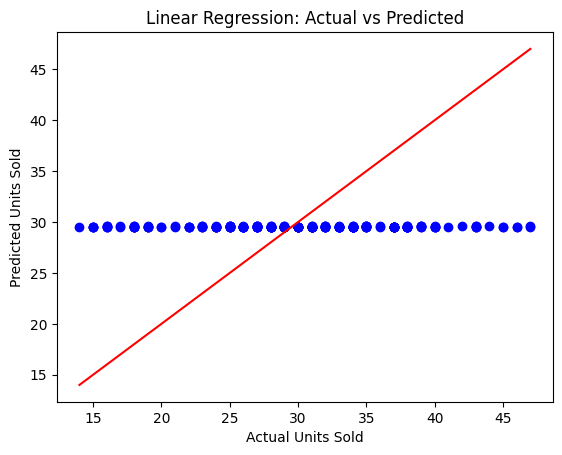

In [ ]:
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Part Two of the Project

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['Category_Median'] = 0

In [ ]:
median_per_category = data.groupby('Product_Category')['Units_Sold'].median()
print(median_per_category)

Product_Category
Electronics    29.0
Fashion        30.5
Home Decor     30.0
Sports         29.0
Toys           29.0
Name: Units_Sold, dtype: float64


In [ ]:
median_dict = {'Electronics': 29.0,'Fashion': 30.5,'Home Decor': 30.0,'Sports': 29.0,'Toys': 29.0}


data['Category_Median'] = data['Product_Category'].map(median_dict)

In [ ]:
data['Sales_Category'] = 'Low'


data.loc[data['Units_Sold'] >= data['Category_Median'], 'Sales_Category'] = 'High'

In [ ]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Category_Median,Sale_Category,Sales_Category
0,01-01-2023,Sports,932.80,35.82,0,6780.38,32,29.0,High,High
1,02-01-2023,Toys,569.48,3.60,1,6807.56,16,29.0,High,Low
2,03-01-2023,Home Decor,699.68,3.56,1,3793.91,27,30.0,High,Low
3,04-01-2023,Toys,923.27,0.61,1,9422.75,29,29.0,High,High
4,05-01-2023,Toys,710.17,47.83,1,1756.83,17,29.0,High,Low


In [ ]:
del data['Sale_Category']

In [ ]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Category_Median,Sales_Category
0,01-01-2023,Sports,932.80,35.82,0,6780.38,32,29.0,High
1,02-01-2023,Toys,569.48,3.60,1,6807.56,16,29.0,Low
2,03-01-2023,Home Decor,699.68,3.56,1,3793.91,27,30.0,Low
3,04-01-2023,Toys,923.27,0.61,1,9422.75,29,29.0,High
4,05-01-2023,Toys,710.17,47.83,1,1756.83,17,29.0,Low


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.columns

Index(['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold', 'Category_Median', 'Sales_Category'],
      dtype='object')

In [ ]:
le = LabelEncoder()
# Use 'Sales_Category' instead of 'Sale_Category'
data['Sales_Category'] = le.fit_transform(data['Sales_Category'])

In [ ]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Category_Median,Sales_Category
0,01-01-2023,Sports,932.80,35.82,0,6780.38,32,29.0,0
1,02-01-2023,Toys,569.48,3.60,1,6807.56,16,29.0,1
2,03-01-2023,Home Decor,699.68,3.56,1,3793.91,27,30.0,1
3,04-01-2023,Toys,923.27,0.61,1,9422.75,29,29.0,0
4,05-01-2023,Toys,710.17,47.83,1,1756.83,17,29.0,1


In [ ]:
# Separate input features (X) and target variable (y)
X = data[['Price', 'Discount', 'Marketing_Spend', 'Customer_Segment']]  # independent variables
# Use the correct column name 'Sales_Category'
y = data['Sales_Category']  # dependent variable (0 = Low, 1 = High)

In [ ]:
# Split the data into training and testing sets
# test_size = 0.2 means 20% of data will be used for testing, 80% for training
# random_state ensures the result is repeatable every time the code runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the Decision Tree model object
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train (fit) the model using the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict the categories on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Compare the predicted values to the actual test labels using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.48


The model's accuracy of 48% indicates poor performance, suggesting it struggles to reliably predict whether sales will be 'Low' or 'High'. The model's predictions are slightly worse than simply guessing randomly.

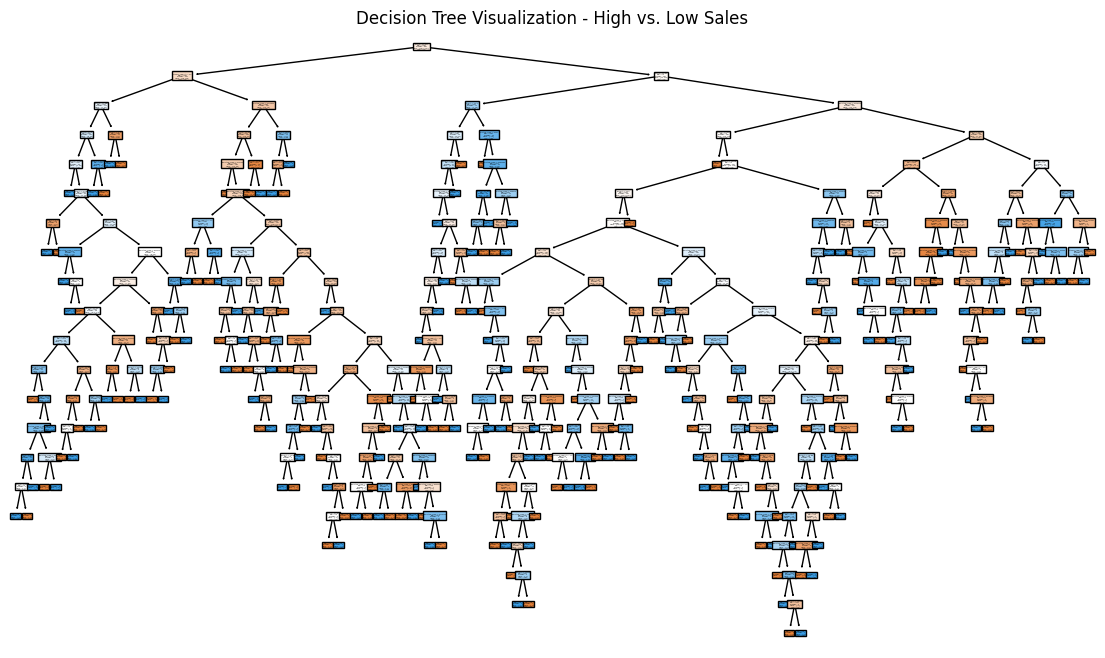

In [ ]:
# Plot the trained decision tree for understanding feature importance
plt.figure(figsize=(14, 8))  # set the size of the plot
plot_tree(clf,
          feature_names=['Price', 'Discount', 'Marketing_Spend', 'Customer_Segment'],
          class_names=['Low', 'High'],
          filled=True)
plt.title("Decision Tree Visualization - High vs. Low Sales")
plt.show()

In [ ]:
print("\nFeature Importances:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance:.2f}")


Feature Importances:
Price: 0.35
Discount: 0.30
Marketing_Spend: 0.29
Customer_Segment: 0.07


In summary, for this Decision Tree model, Price, Discount, and Marketing Spend are the primary drivers in classifying sales into 'Low' or 'High' categories, with Price being slightly more influential. Customer Segment has a much smaller impact on this classification.

This information is valuable for understanding which factors are most strongly associated with higher or lower sales performance in your dataset, according to this specific model. You could use this insight for business strategies, such as focusing on pricing, discounts, and marketing campaigns, as they seem to have the biggest leverage on sales outcomes